In [30]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from time import time

dataset = pd.read_csv('bank.csv')

#display the first ten instances of the dataset
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5.0,may,139,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5.0,may,217,1,-1.0,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5.0,may,380,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5.0,may,50,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5.0,may,55,1,-1.0,0,unknown,no


In [31]:
dataset.shape

(15111, 17)

In [32]:
# check for missing values
dataset.isnull().sum()

age             0
job            69
marital        12
education      31
default        51
balance         1
housing        15
loan            0
contact        30
day           123
month         112
duration        0
campaign        0
pdays          20
previous        0
poutcome        0
subscribed      0
dtype: int64

In [33]:
#check the number of rows with missing data

data = dataset.copy()
data.dropna(inplace = True)
missing_values = dataset.shape[0] - data.shape[0]
#calculate the percentage of the removed data from the overall data 
print float(missing_values)/float(dataset.shape[0]) * 100.00

1.93236714976


In [34]:
# Delete the missing values instances
dataset.dropna(inplace=True)

In [35]:
dataset.shape

(14819, 17)

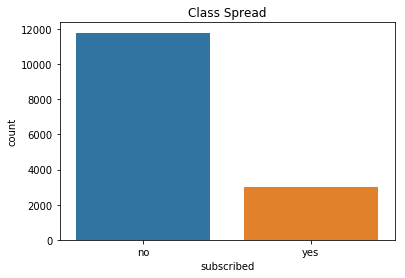

In [36]:
sns.countplot('subscribed', data=dataset)
plt.title('Class Spread')
plt.show()

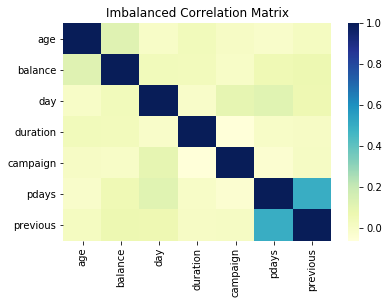

In [37]:
fig, ax = plt.subplots()         
# Imbalanced DataFrame Correlation
corr = dataset.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix")
plt.show()

In [38]:
#Shuffle the data before undersampling
data_shuffle = dataset.sample(frac = 1, random_state = 432)
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198,1,-1.0,0,unknown,no


In [39]:
#Divide the data based on the class
not_subscribed = data_shuffle.loc[data_shuffle['subscribed'] == 'no']

subscribed = data_shuffle.loc[data_shuffle['subscribed'] == 'yes']

In [40]:
subscribed.shape

(3031, 17)

In [41]:
#Delete instances of the not_subscribed to match the subscribed
not_subscribed = not_subscribed.sample(n = 3031, random_state = 534)
not_subscribed.shape

(3031, 17)

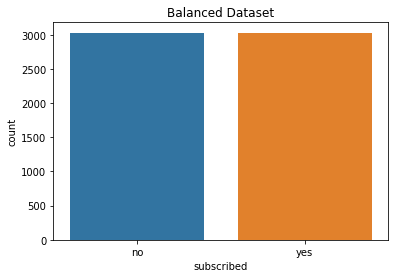

In [42]:
dataset = pd.concat([not_subscribed, subscribed])
sns.countplot('subscribed', data = dataset)
plt.title('Balanced Dataset')
plt.show()

In [43]:
dataset.shape

(6062, 17)

In [44]:
dataset.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance       float64
housing        object
loan           object
contact        object
day           float64
month          object
duration        int64
campaign        int64
pdays         float64
previous        int64
poutcome       object
subscribed     object
dtype: object

In [45]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
14949,25,technician,single,secondary,no,3843.0,no,no,cellular,18.0,oct,159,2,95.0,2,failure,no
5183,35,technician,married,secondary,no,0.0,no,no,cellular,11.0,jul,271,2,-1.0,0,unknown,no
2987,37,admin.,divorced,secondary,no,-113.0,yes,no,unknown,14.0,may,5,2,-1.0,0,unknown,no
14842,26,management,single,tertiary,no,1592.0,no,no,cellular,6.0,oct,604,2,485.0,5,other,no
3329,43,services,divorced,tertiary,no,2279.0,no,yes,unknown,26.0,jun,344,1,-1.0,0,unknown,no


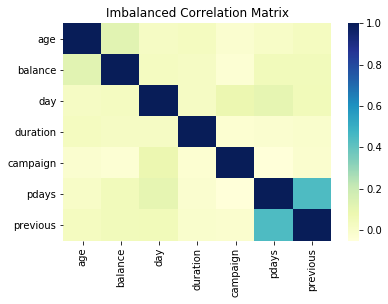

In [46]:
fig, ax = plt.subplots()         
# Imbalanced DataFrame Correlation
corr = dataset.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("Imbalanced Correlation Matrix")
plt.show()

In [47]:
# Using label encoding
lists = ['education','default','housing','loan','month','poutcome','subscribed']
for i in lists:
   dataset[i] = pd.Categorical(dataset[i])
   dataset[i] = dataset[i].cat.codes
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
14949,25,technician,single,1,0,3843.0,0,0,cellular,18.0,10,159,2,95.0,2,0,0
5183,35,technician,married,1,0,0.0,0,0,cellular,11.0,5,271,2,-1.0,0,3,0
2987,37,admin.,divorced,1,0,-113.0,1,0,unknown,14.0,8,5,2,-1.0,0,3,0
14842,26,management,single,2,0,1592.0,0,0,cellular,6.0,10,604,2,485.0,5,1,0
3329,43,services,divorced,2,0,2279.0,0,1,unknown,26.0,6,344,1,-1.0,0,3,0


In [48]:
#Using One Hot encoding 
dataset = pd.get_dummies(dataset, columns=['marital','job','contact'],prefix=['marital','job','contact'])
dataset.head(5)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
14949,25,1,0,3843.0,0,0,18.0,10,159,2,...,0,0,0,0,1,0,0,1,0,0
5183,35,1,0,0.0,0,0,11.0,5,271,2,...,0,0,0,0,1,0,0,1,0,0
2987,37,1,0,-113.0,1,0,14.0,8,5,2,...,0,0,0,0,0,0,0,0,0,1
14842,26,2,0,1592.0,0,0,6.0,10,604,2,...,0,0,0,0,0,0,0,1,0,0
3329,43,2,0,2279.0,0,1,26.0,6,344,1,...,0,0,1,0,0,0,0,0,0,1


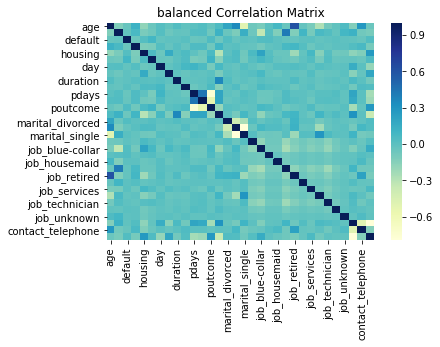

In [49]:
fig, ax = plt.subplots()
corr = dataset.corr()
sns.heatmap(corr, cmap='YlGnBu', ax=ax)
ax.set_title("balanced Correlation Matrix")
plt.show()

In [50]:
#seperating class from attributes
print dataset.shape
train_data = dataset.copy()
del train_data['subscribed']
X = train_data
y = dataset[['subscribed']]
print X.shape
print y.shape

(6062, 32)
(6062, 31)
(6062, 1)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
parameters = {'max_iter': [1000,1100,1200,1300], 'hidden_layer_sizes':np.arange(10, 13)}
classifier = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
#This is the one I used, It takes more than one hour
#parameters = {'solver': ['lbfgs','adam','sgd'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000], 'hidden_layer_sizes':np.arange(10, 20)}
#classifier = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [54]:
#Due to the brute forcing nature of how GridSearchCv
#This step will take a long time
start = time()
classifier.fit(X_train, y_train.values.ravel())
test = classifier.predict(X_test)
print test
print(classifier.best_params_)
print (time() - start)

[0 0 1 ... 0 0 0]
{'max_iter': 1200, 'hidden_layer_sizes': 10}
39.9001481533


In [55]:
#Accuracy Score
print 'The accuracy score is : ' , accuracy_score(y_test, test)

The accuracy score is :  0.8285243198680956


Text(0.5,1,'Confusion Matrix')

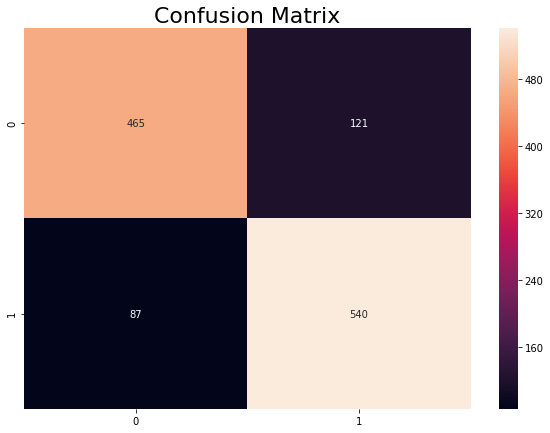

In [56]:
#Confusion Matrix
cm = confusion_matrix(y_test, test)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=22)

In [57]:
#Classification report 
from sklearn.metrics import classification_report
cr = classification_report(y_test, test)
print cr

             precision    recall  f1-score   support

          0       0.84      0.79      0.82       586
          1       0.82      0.86      0.84       627

avg / total       0.83      0.83      0.83      1213

